In [ ]:
#KO H04
#tukivektorikone ja pulsaridata

In [1]:
import pandas as pd
from scipy.io.arff import loadarff

#luetaan data
data = 'HTRU_2.csv'
df = pd.read_csv(data, header=None)

#Attribute-Relation File Format
#ja siitä suoraan otsikoiksi
arff = loadarff('HTRU_2.arff')
names_data = pd.DataFrame(arff[0])
df.columns = list(names_data.columns.values)

print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis',
       'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis', 'class'],
      dtype='object')
First row by position: Profile_mean        140.562500
Profile_stdev        55.683782
Profile_skewness     -0.234571
Profile_kurtosis     -0.699648
DM_mean               3.199833
DM_stdev             19.110426
DM_skewness           7.975532
DM_kurtosis          74.242225
class                 0.000000
Name: 0, dtype: float64


# oma kommentti

Tässä luetaan sarakkeiden nimet suoraan `.arff`-tiedostosta. Sitä varten ladattiin valmis funktio `scipy`-kirjastosta. Datasettiä ei saa skaalata ennen jakamista ja siksi se tehdään vasta tuossa alempana.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#luokkamuuttujan eristäminen ja aineiston splittaus
#X = df.drop(columns='class')
X = df.drop(columns=['class','Profile_skewness','Profile_kurtosis','DM_skewness','DM_kurtosis'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1492)

#nyt tehdään skaalaus
sts = StandardScaler().fit(X_train)
X_train = pd.DataFrame(sts.transform(X_train))
X_test = pd.DataFrame(sts.transform(X_test))

print(f'X_train: {len(X_train)}')
print(f'X_test: {len(X_test)}')
print(f'y_train: {len(y_train)}')
print(f'y_test: {len(y_test)}')

X_train: 8949
X_test: 8949
y_train: 8949
y_test: 8949


In [21]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

#tukivektorikone lineaarisella kernelifunktiolla
svm = LinearSVC(max_iter=3000)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

#luokitteluraportti ja sekaannusmatriisi
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      8140
           1       0.91      0.74      0.82       809

    accuracy                           0.97      8949
   macro avg       0.94      0.86      0.90      8949
weighted avg       0.97      0.97      0.97      8949

Confusion matrix:
 [[8084   56]
 [ 213  596]]


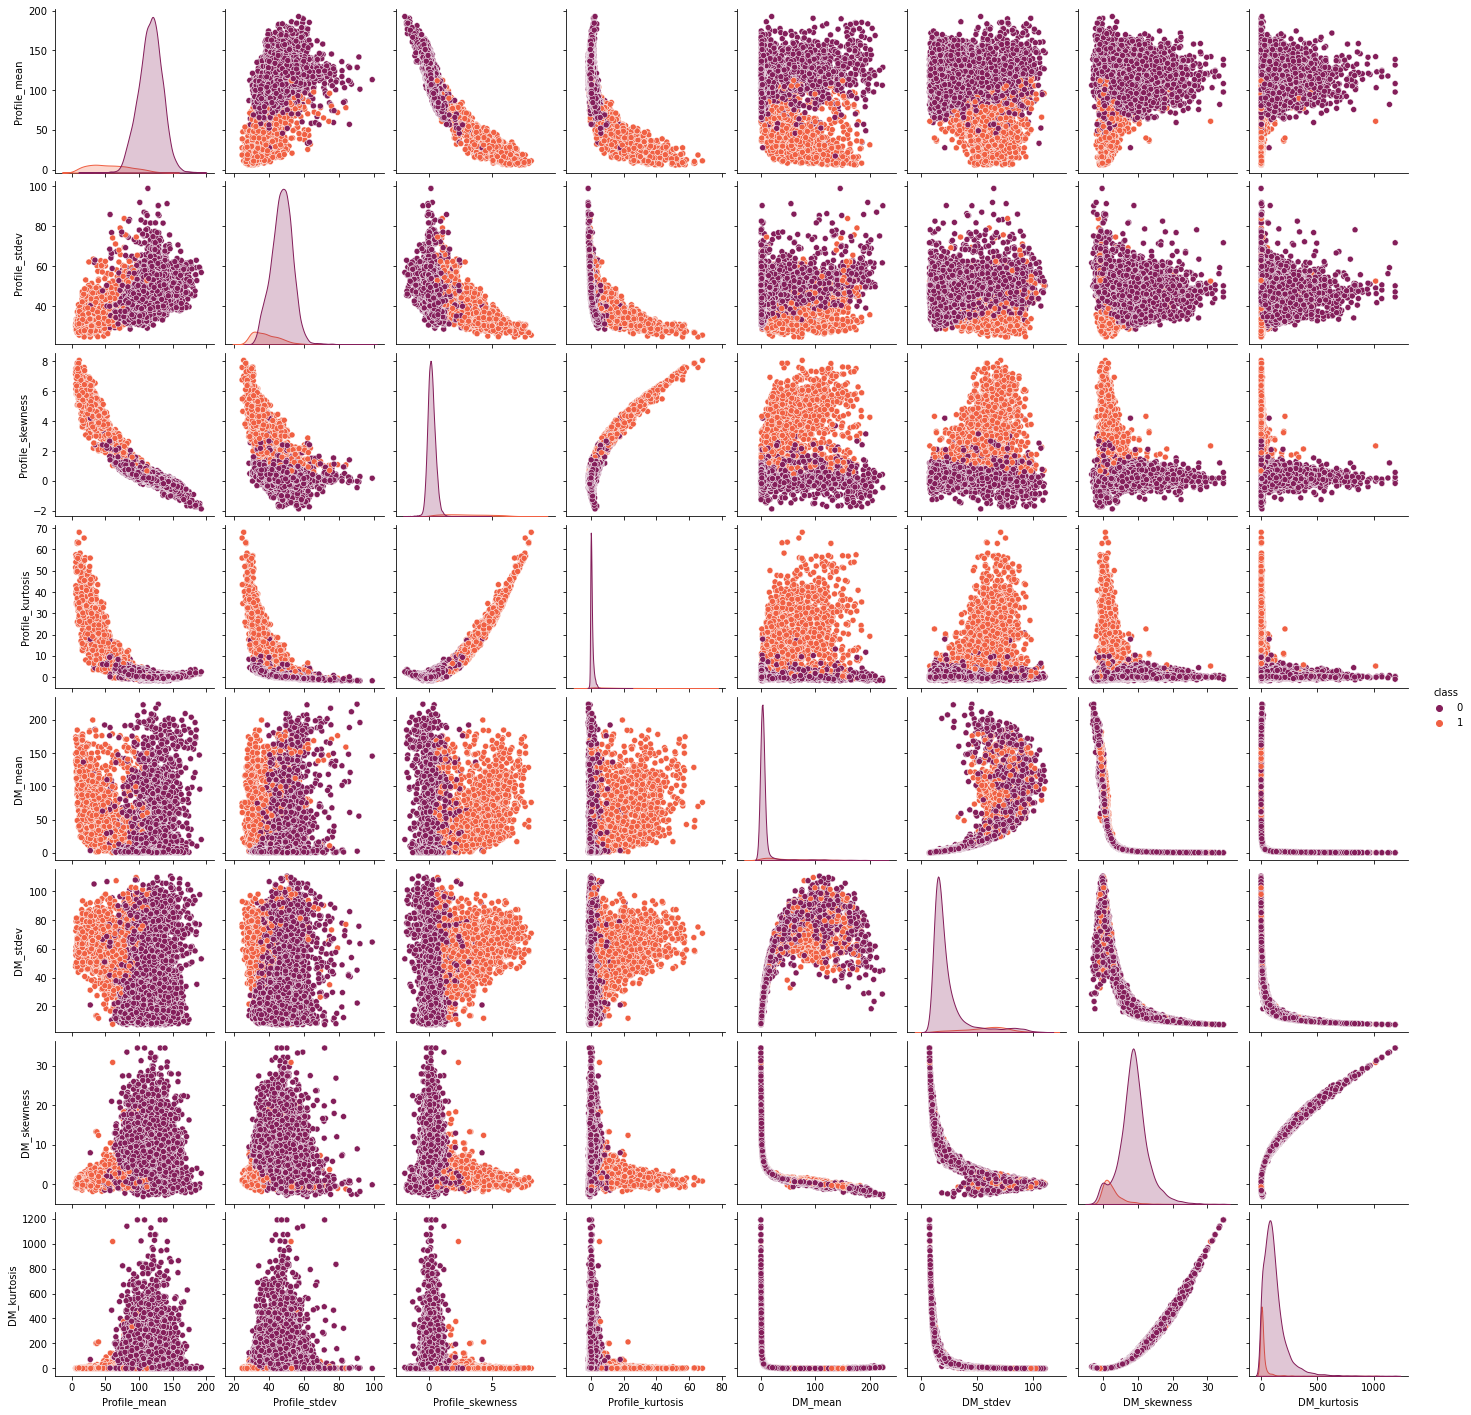

In [22]:
import seaborn as sns
colors = sns.color_palette('rocket', n_colors=2)
ax = sns.pairplot(df, hue='class', palette=colors)